## Минипроект по статистике 4
## Statistics miniproject 4

order_id - id заказа <br>
delivery_time - время доставки в минутах <br>
district - район доставки <br>
experiment_group - экспериментальная группа

order_id - order id <br>
delivery_time - delivery time in minutes <br>
district - delivery area <br>
experiment_group - experimental group <br>

In [107]:
import pandas as pd
data=pd.read_csv('~/experiment_lesson_4.csv')

In [108]:
data

,order_id,delivery_time,district,experiment_group
0,3159,44.0,Purlieus,control
1,10426,51.0,Purlieus,control
2,9155,46.0,Purlieus,control
3,10699,34.0,Purlieus,control
4,10061,43.0,Purlieus,control
...,...,...,...,...
20191,14561,42.0,Suburb,test
20192,12015,32.0,Suburb,test
20193,20077,23.0,Purlieus,test
20194,14861,41.0,Central,test


Вопрос 1 <br>
Постройте распределение заказов по экспериментальным группам <br>
Question 1 <br>
Plot the distribution of orders across experimental groups <br>

In [109]:
test=data.query('experiment_group=="test"')
control=data.query('experiment_group=="control"')

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

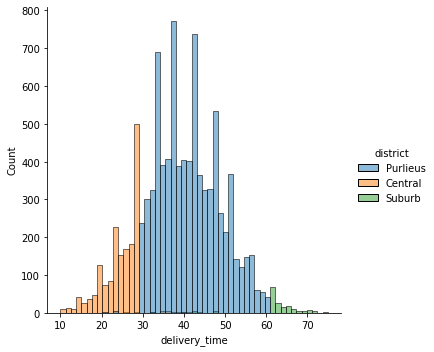

In [111]:
sns.displot(x='delivery_time',data=test, hue='district')

sns.displot(x='delivery_time',data=control, hue='district')

Вопрос 2 <br>
Посчитайте количество наблюдений в тестовой и контрольной группе. <br>
На сколько по модулю отличается количество наблюдений в тесте и контроле? <br>
Question 2 <br>
Count the number of observations in the test and control groups. <br>
What is the modulo difference between the number of observations in the test and control?

In [112]:
abs(data.groupby(['experiment_group']).count().loc['control'][0]-\
data.groupby(['experiment_group']).count().loc['test'][0])

12

In [113]:
data.groupby(['experiment_group']).count()

,order_id,delivery_time,district
experiment_group,,,
control,10092,10092,10092
test,10104,10104,10104


Вопрос 3 <br>
При помощи теста Шапиро-Уилка проведите проверку на нормальность для экспериментальных групп <br>
Question 3 <br> 
With the help of Shapiro-Wilk test for normality experimental groups

In [114]:
from scipy import stats

In [115]:
test_sample=data[data['experiment_group'] == 'test']['delivery_time'].sample(1000, random_state=17)

In [116]:
shapiro_test_sample=stats.shapiro(test_sample)
shapiro_test_sample

ShapiroResult(statistic=0.9975479245185852, pvalue=0.14013493061065674)

In [117]:
control_sample=data[data['experiment_group'] == 'control']['delivery_time'].sample(1000, random_state=17)

In [118]:
shapiro_control_sample=stats.shapiro(control_sample)
shapiro_control_sample

ShapiroResult(statistic=0.9974725842475891, pvalue=0.12411931157112122)

In [119]:
test['delivery_time'].describe()

count    10104.000000
mean        39.046813
std          9.883308
min         10.000000
25%         32.000000
50%         39.000000
75%         46.000000
max         75.000000
Name: delivery_time, dtype: float64

In [120]:
control['delivery_time'].describe()

count    10092.000000
mean        45.065101
std          9.990017
min         15.000000
25%         38.000000
50%         45.000000
75%         52.000000
max         83.000000
Name: delivery_time, dtype: float64

Вопрос 4 <br>
Сравните средние при помощи Т-теста для теста и контроля <br>
Question 4 <br>
Compare means with the help of T-test for test and control groups <br>

In [121]:
t_test=stats.ttest_ind(test['delivery_time'],control['delivery_time'])
t_test

Ttest_indResult(statistic=-43.03582663183714, pvalue=0.0)

Вопрос 5 <br>
Рассчитайте изменение среднего при переходе от контрольной группы к тестовой в % <br>
Question 5 <br>
Calculate mean change from control to test group in %

In [122]:
round(39.046813/45.065101-1,4)

-0.1335